# Titanic data

## Import Packages

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [182]:
raw_data = pd.read_csv('train.csv')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [183]:
data = raw_data.drop(['PassengerId','Name','Ticket'],axis = 1)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### plot data

In [184]:
data.isnull().sum()
data = data.drop(['Cabin'],axis = 1)

### Deal with 'Age' missing values

In [185]:
bysexclass = data.groupby(['Sex', 'Pclass'])
def impute_median(series):
    return series.fillna(series.median())
data.Age = bysexclass['Age'].transform(impute_median)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [186]:
data = data.dropna()

## Plot the data

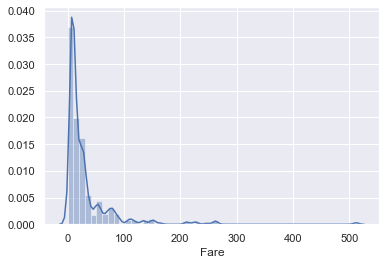

In [187]:
sns.distplot(data['Fare'])

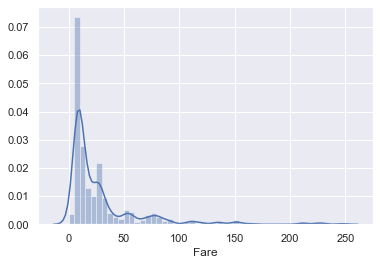

In [188]:
q = data['Fare'].quantile(0.99)
data_1  = data[data['Fare']<q]
sns.distplot(data_1['Fare'])

In [189]:
data_1.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,880.000000,880.00000,880,880.000000,880.000000,880.000000,880.000000,880
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,573,NaN,NaN,NaN,NaN,640
mean,0.378409,2.32500,NaN,29.050193,0.513636,0.369318,28.886604,NaN
std,0.485266,0.82829,NaN,13.265637,1.097021,0.791717,36.529792,NaN
min,0.000000,1.00000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.00000,NaN,21.500000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.00000,NaN,26.000000,0.000000,0.000000,14.427100,NaN
75%,1.000000,3.00000,NaN,36.000000,1.000000,0.000000,30.500000,NaN


In [190]:
data_1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [191]:
data_1['Embarked'].value_counts()

S    640
C    163
Q     77
Name: Embarked, dtype: int64

## Create Dummies for 'Sex' and 'Embarked'

In [192]:
data_2 = data_1.copy()

In [193]:
data_2['Embarked'] = data_2['Embarked'].map({'S':0,'C':1,'Q':1})
data_2['Sex'] = data_2['Sex'].map({'male':0,'female':1})

In [194]:
data_2['Embarked'].value_counts()

0    640
1    240
Name: Embarked, dtype: int64

In [195]:
data_2['Sex'].value_counts()

0    573
1    307
Name: Sex, dtype: int64

In [196]:
data_2['Parch'].value_counts()

0    674
1    117
2     75
5      5
3      5
4      3
6      1
Name: Parch, dtype: int64

In [197]:
data_cleaned = data_2.copy()

## Scale inputs

In [198]:
data_cleaned.shape

(880, 8)

In [199]:
unscaled_inputs = data_cleaned.iloc[:,1:]
unscaled_inputs.reset_index(inplace = True)
unscaled_inputs = unscaled_inputs.drop(['index'], axis = 1)

In [200]:
unscaled_inputs.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Create a function that will not scale dummy variables

In [201]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [202]:
# choose the columns to scale

columns_to_omit = ['Sex','Embarked']
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [203]:
# declare a scaler object, specifying the columns you want to scale
survive_scaler = CustomScaler(columns_to_scale)
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
survive_scaler.fit(unscaled_inputs)

/Users/wenwanchun/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], copy=None,
             with_mean=None, with_std=None)

In [204]:
scaled_inputs = survive_scaler.transform(unscaled_inputs)

In [205]:
# the scaled_inputs are now an ndarray, because sklearn works with ndarrays
scaled_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.815396,0,-0.531765,0.443602,-0.466743,-0.592637,0
1,-1.600592,1,0.675045,0.443602,-0.466743,1.161266,1
2,0.815396,1,-0.230063,-0.468477,-0.466743,-0.574148,0
3,-1.600592,1,0.448768,0.443602,-0.466743,0.663217,0
4,0.815396,0,0.448768,-0.468477,-0.466743,-0.570725,0
5,0.815396,0,-0.305488,-0.468477,-0.466743,-0.559541,1
6,-1.600592,0,1.881854,-0.468477,-0.466743,0.629321,0
7,0.815396,0,-2.040277,2.267758,0.797053,-0.213964,0
8,0.815396,1,-0.154637,-0.468477,2.060848,-0.486272,0
9,-0.392598,1,-1.135170,0.443602,-0.466743,0.032436,1


In [206]:
pd.set_option('display.max_rows', 1000)
scaled_inputs.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Start Logistic Regression

In [210]:
y = data_cleaned['Survived']
x1 = scaled_inputs
y = list(y)

In [211]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)

In [212]:
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.441281
         Iterations 6


In [213]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  880
Model:                          Logit   Df Residuals:                      872
Method:                           MLE   Df Model:                            7
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.3347
Time:                        14:36:08   Log-Likelihood:                -388.33
converged:                       True   LL-Null:                       -583.69
Covariance Type:            nonrobust   LLR p-value:                 2.333e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7231      0.136    -12.675      0.000      -1.990      -1.457
Pclass        -1.0486      0.132     -7.945      0.000      -1.307      -0.790
Sex            2.6834      0.200     13.397      0.000       2.291       3.076
Age           -0.5839      0.109     -5.374      0.000      -0.797      -0.371
SibSp         -0.3569      0.121     -2.947      0.003      -0.594      -0.120
Parch         -0.0425      0.096     -0.445      0.656      -0.230       0.145
Fare          -0.0287      0.126     -0.228      0.820      -0.276       0.218
Embarked       0.3466      0.205      1.694      0.090      -0.054       0.748
==============================================================================
"""

In [219]:
np.exp(-0.58)

0.559898366565402

## Using unscaled data

In [214]:
y = data_cleaned['Survived']
x1 = unscaled_inputs
y = list(y)
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)

In [215]:
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.441281
         Iterations 6


In [216]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  880
Model:                          Logit   Df Residuals:                      872
Method:                           MLE   Df Model:                            7
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.3347
Time:                        14:38:35   Log-Likelihood:                -388.33
converged:                       True   LL-Null:                       -583.69
Covariance Type:            nonrobust   LLR p-value:                 2.333e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7110      0.553      4.906      0.000       1.628       3.794
Pclass        -1.2667      0.159     -7.945      0.000      -1.579      -0.954
Sex            2.6834      0.200     13.397      0.000       2.291       3.076
Age           -0.0440      0.008     -5.374      0.000      -0.060      -0.028
SibSp         -0.3255      0.110     -2.947      0.003      -0.542      -0.109
Parch         -0.0538      0.121     -0.445      0.656      -0.290       0.183
Fare          -0.0008      0.003     -0.228      0.820      -0.008       0.006
Embarked       0.3466      0.205      1.694      0.090      -0.054       0.748
==============================================================================
"""